In [1]:
import pandas as pd
import numpy as np

import pylab as plt
import seaborn as sns

import re
import funciones as fn

import warnings
warnings.filterwarnings('ignore')  # esto es para quitar prints

pd.set_option('display.max_columns', None)   # mostrar todas las columnas del df

In [2]:
#Leemos los archivos
estadio = pd.read_csv(r'../data/stadiums.csv')
match = pd.read_csv(r'../data/matches.csv')
team = pd.read_csv(r'../data/teams.csv')
player = pd.read_csv(r'../data/players.csv')

### LIMPIAMOS ESTADIO

In [3]:
estadio.head()

,Unnamed: 0,Estadio,Capacidad,Equipo
0,0,Camp Nou,"99,354",Barcelona
1,1,Santiago Bernabeu,81.044,Real Madrid
2,2,Estadio Metropolitano,68.456,Atletico Madrid
3,3,Benito Villamarín,60.721,Real Betis
4,4,Lluís Companys,"60,713",FC Penger


In [4]:
estadio.columns = ['Id', 'Stadium', 'Capacity', 'Team']

In [5]:
estadio.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        66 non-null     int64 
 1   Stadium   66 non-null     object
 2   Capacity  66 non-null     object
 3   Team      66 non-null     object
dtypes: int64(1), object(3)
memory usage: 14.6 KB


In [6]:
lista=[]
for x in estadio.Capacity:
    x = x.replace('.', '').replace(',', '')
    x = int(x)
    lista.append(x)
estadio.Capacity = lista
estadio.head()

,Id,Stadium,Capacity,Team
0,0,Camp Nou,99354,Barcelona
1,1,Santiago Bernabeu,81044,Real Madrid
2,2,Estadio Metropolitano,68456,Atletico Madrid
3,3,Benito Villamarín,60721,Real Betis
4,4,Lluís Companys,60713,FC Penger


In [7]:
estadio.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        66 non-null     int64 
 1   Stadium   66 non-null     object
 2   Capacity  66 non-null     int64 
 3   Team      66 non-null     object
dtypes: int64(2), object(2)
memory usage: 11.1 KB


'N nan cols: 0'

Series([], dtype: float64)

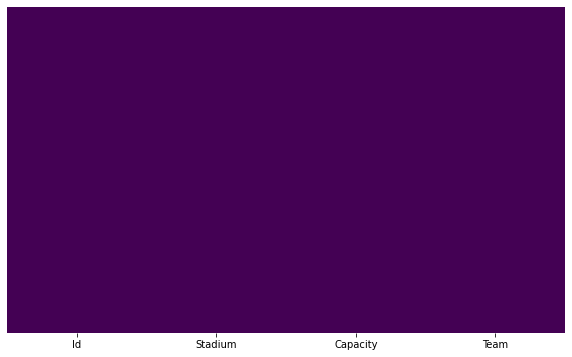

In [8]:
fn.check_nan(estadio)

In [9]:
fn.check_value(estadio, estadio.columns) 

0     1
49    1
35    1
36    1
37    1
Name: Id, dtype: int64
Camp Nou                  1
Montilivi                 1
Carlos Belmonte           1
Coliseum Alfonso Pérez    1
El Helmántico             1
Name: Stadium, dtype: int64
10000    3
81044    1
19336    1
17524    1
17393    1
Name: Capacity, dtype: int64
Barcelona       1
Girona          1
Albacete        1
Getafe          1
Salamanca CF    1
Name: Team, dtype: int64


In [10]:
fn.check_unique(estadio, estadio.columns)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65]
['Camp Nou' 'Santiago Bernabeu' 'Estadio Metropolitano'
 'Benito Villamarín' 'Lluís Companys' 'La Cartuja' 'San Mamés' 'Mestalla'
 'Ramón Sánchez Pizjuán' 'Estadio RCDE' 'Anoeta' 'Martínez Valero'
 'La Romareda' 'Abanca Riazor' 'Gran Canaria' 'Nueva Condomina'
 'Carlos Tartiere' 'La Rosaleda' 'José Rico Pérez' 'El Molinón' 'Balaídos'
 'José Zorrilla' 'Ciutat de Valencia' 'Ramón de Carranza' 'El Sadar'
 'Estadio de la Cerámica' 'Son Moix' 'Heliodoro Rodríguez López'
 'El Sardinero' 'Nuevo Colombino' 'Estadio del Mediterráneo'
 'Nuevo Arcángel' 'Chapín' 'Mendizorrotza' 'Los Cármenes'
 'Carlos Belmonte' 'Coliseum Alfonso Pérez' 'El Helmántico'
 'Municipal La Línea' 'Estadio Las Gaunas' 'Nuevo Vivero' 'Cartagonova'
 'Romano' 'Nou Estadi' 'Vallecas' 'Castalia' 'El Soto' "Camp d'esports"
 'Jua

In [11]:
estadio.duplicated().any() #No hay duplicados

False

In [12]:
estadio.tail() #Limpios

,Id,Stadium,Capacity,Team
61,61,Ciudad de Málaga ( es ),10816,Atletismo
62,62,Pasarón,10500,Pontevedra
63,63,Álvarez Claro,10000,Melilla
64,64,Linarejos,10000,Linares
65,65,Las Mestas,10000,Marineros de Gijón (fútbol americano) CSI Gijó...


### LIMPIAMOS TEAM

In [13]:
team.tail()

,Unnamed: 0,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK
37,37,Sporting Gijón,26,27.4,45.3,15,165,"1,350",15.0,19,13,19,0,0,31,0,1.27,0.87,2.13,1.27,2.13
38,38,Tenerife,28,28.6,46.5,15,165,"1,350",15.0,14,9,11,3,3,40,4,0.93,0.60,1.53,0.73,1.33
39,39,UD Ibiza,26,26.7,48.8,15,165,"1,350",15.0,10,8,9,1,1,45,2,0.67,0.53,1.20,0.60,1.13
40,40,Villarreal B,27,22.2,50.1,15,165,"1,350",15.0,19,14,18,1,1,36,1,1.27,0.93,2.20,1.20,2.13
41,41,Zaragoza,25,27.1,53.1,15,165,"1,350",15.0,9,8,9,0,0,40,2,0.60,0.53,1.13,0.60,1.13


In [14]:
team.columns = ['Id', 'Team', 'Pl', 'Age', 'Poss', 'Pj', 'Starts', 'Min',
       '90s', 'Gls', 'Ast', 'GNP', 'GP', 'PS', 'CrdY', 'CrdR', 'Gls/Pj',
       'Ast/Pj', 'G+A', 'GNP/Pj', 'G+A-P/Pj']

In [15]:
team.tail()

,Id,Team,Pl,Age,Poss,Pj,Starts,Min,90s,Gls,Ast,GNP,GP,PS,CrdY,CrdR,Gls/Pj,Ast/Pj,G+A,GNP/Pj,G+A-P/Pj
37,37,Sporting Gijón,26,27.4,45.3,15,165,"1,350",15.0,19,13,19,0,0,31,0,1.27,0.87,2.13,1.27,2.13
38,38,Tenerife,28,28.6,46.5,15,165,"1,350",15.0,14,9,11,3,3,40,4,0.93,0.60,1.53,0.73,1.33
39,39,UD Ibiza,26,26.7,48.8,15,165,"1,350",15.0,10,8,9,1,1,45,2,0.67,0.53,1.20,0.60,1.13
40,40,Villarreal B,27,22.2,50.1,15,165,"1,350",15.0,19,14,18,1,1,36,1,1.27,0.93,2.20,1.20,2.13
41,41,Zaragoza,25,27.1,53.1,15,165,"1,350",15.0,9,8,9,0,0,40,2,0.60,0.53,1.13,0.60,1.13


In [16]:
team.info(memory_usage='deep') #Min a Int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        42 non-null     int64  
 1   Team      42 non-null     object 
 2   Pl        42 non-null     int64  
 3   Age       42 non-null     float64
 4   Poss      42 non-null     float64
 5   Pj        42 non-null     int64  
 6   Starts    42 non-null     int64  
 7   Min       42 non-null     object 
 8   90s       42 non-null     float64
 9   Gls       42 non-null     int64  
 10  Ast       42 non-null     int64  
 11  GNP       42 non-null     int64  
 12  GP        42 non-null     int64  
 13  PS        42 non-null     int64  
 14  CrdY      42 non-null     int64  
 15  CrdR      42 non-null     int64  
 16  Gls/Pj    42 non-null     float64
 17  Ast/Pj    42 non-null     float64
 18  G+A       42 non-null     float64
 19  GNP/Pj    42 non-null     float64
 20  G+A-P/Pj  42 non-null     float64


In [17]:
lista= []
for x in team.Min:
    x = x.replace(',', '')
    x = int(x)
    lista.append(x)
team.Min = lista
team.head()

,Id,Team,Pl,Age,Poss,Pj,Starts,Min,90s,Gls,Ast,GNP,GP,PS,CrdY,CrdR,Gls/Pj,Ast/Pj,G+A,GNP/Pj,G+A-P/Pj
0,0,Almería,26,26.5,45.1,14,154,1260,14.0,16,12,16,0,0,47,3,1.14,0.86,2.00,1.14,2.00
1,1,Athletic Club,25,27.9,52.4,14,154,1260,14.0,23,17,21,2,3,23,1,1.64,1.21,2.86,1.50,2.71
2,2,Atlético Madrid,23,29.0,49.8,14,154,1260,14.0,20,16,20,0,0,43,2,1.43,1.14,2.57,1.43,2.57
3,3,Barcelona,25,26.5,64.3,14,154,1260,14.0,33,23,33,0,1,33,3,2.36,1.64,4.00,2.36,4.00
4,4,Betis,27,28.8,50.1,14,154,1260,14.0,16,9,13,3,3,33,7,1.14,0.64,1.79,0.93,1.57


'N nan cols: 0'

Series([], dtype: float64)

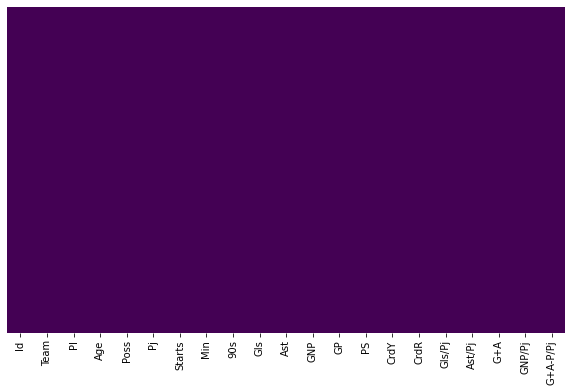

In [18]:
fn.check_nan(team)

In [19]:
fn.check_value(team, team.columns) 

0     1
31    1
23    1
24    1
25    1
Name: Id, dtype: int64
Almería        1
Levante        1
Burgos         1
Cartagena      1
CD Mirandés    1
Name: Team, dtype: int64
26    10
25     9
23     7
24     5
27     4
Name: Pl, dtype: int64
26.5    3
28.8    3
27.7    3
26.7    2
26.6    2
Name: Age, dtype: int64
50.1    2
46.5    2
58.0    2
53.9    2
45.1    1
Name: Poss, dtype: int64
15    22
14    20
Name: Pj, dtype: int64
165    22
154    20
Name: Starts, dtype: int64
1350    22
1260    20
Name: Min, dtype: int64
15.0    22
14.0    20
Name: 90s, dtype: int64
16    5
14    5
13    5
19    5
17    4
Name: Gls, dtype: int64
9     8
12    5
10    5
11    4
14    3
Name: Ast, dtype: int64
13    6
12    5
15    5
11    5
14    4
Name: GNP, dtype: int64
0    11
1    11
2     9
3     7
4     4
Name: GP, dtype: int64
2    11
1    10
0     7
3     7
5     3
Name: PS, dtype: int64
43    4
36    3
40    3
31    3
32    3
Name: CrdY, dtype: int64
3    11
2    10
1     7
4     6
0     3
Name: C

In [20]:
fn.check_unique(team, team.columns)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
['Almería' 'Athletic Club' 'Atlético Madrid' 'Barcelona' 'Betis' 'Cádiz'
 'Celta Vigo' 'Elche' 'Espanyol' 'Getafe' 'Girona' 'Mallorca' 'Osasuna'
 'Rayo Vallecano' 'Real Madrid' 'Real Sociedad' 'Sevilla' 'Valencia'
 'Valladolid' 'Villarreal' 'Alavés' 'Albacete' 'Andorra' 'Burgos'
 'Cartagena' 'CD Mirandés' 'Eibar' 'Granada' 'Huesca' 'Las Palmas'
 'Leganés' 'Levante' 'Lugo' 'Málaga' 'Oviedo' 'Ponferradina' 'Racing Sant'
 'Sporting Gijón' 'Tenerife' 'UD Ibiza' 'Villarreal B' 'Zaragoza']
[26 25 23 27 21 24 22 28 31]
[26.5 27.9 29.  28.8 29.3 27.7 28.1 28.3 28.5 27.8 26.1 29.4 24.4 26.6
 27.  25.7 27.3 30.9 24.  28.6 28.4 29.2 27.6 30.5 28.  26.7 27.4 22.2
 27.1]
[45.1 52.4 49.8 64.3 50.1 40.6 51.5 43.4 42.5 39.  52.7 41.2 46.1 53.9
 58.  56.  54.4 48.2 52.8 44.6 51.9 65.8 41.3 48.9 53.3 54.2 41.1 65.5
 52.9 51.2 41.9 55.5 46.5 50.7 37.9 45.3 48.8 53.1]
[14 15]
[1

In [21]:
team.Team.unique()

array(['Almería', 'Athletic Club', 'Atlético Madrid', 'Barcelona',
       'Betis', 'Cádiz', 'Celta Vigo', 'Elche', 'Espanyol', 'Getafe',
       'Girona', 'Mallorca', 'Osasuna', 'Rayo Vallecano', 'Real Madrid',
       'Real Sociedad', 'Sevilla', 'Valencia', 'Valladolid', 'Villarreal',
       'Alavés', 'Albacete', 'Andorra', 'Burgos', 'Cartagena',
       'CD Mirandés', 'Eibar', 'Granada', 'Huesca', 'Las Palmas',
       'Leganés', 'Levante', 'Lugo', 'Málaga', 'Oviedo', 'Ponferradina',
       'Racing Sant', 'Sporting Gijón', 'Tenerife', 'UD Ibiza',
       'Villarreal B', 'Zaragoza'], dtype=object)

In [22]:
lista = []
for x in team.Team:
    x = x.replace('á','a').replace('é', 'e').replace('í', 'i').replace('ó', 'o').replace('ú', 'u')
    lista.append(x)
team.Team = lista
team.Team.unique()

array(['Almeria', 'Athletic Club', 'Atletico Madrid', 'Barcelona',
       'Betis', 'Cadiz', 'Celta Vigo', 'Elche', 'Espanyol', 'Getafe',
       'Girona', 'Mallorca', 'Osasuna', 'Rayo Vallecano', 'Real Madrid',
       'Real Sociedad', 'Sevilla', 'Valencia', 'Valladolid', 'Villarreal',
       'Alaves', 'Albacete', 'Andorra', 'Burgos', 'Cartagena',
       'CD Mirandes', 'Eibar', 'Granada', 'Huesca', 'Las Palmas',
       'Leganes', 'Levante', 'Lugo', 'Malaga', 'Oviedo', 'Ponferradina',
       'Racing Sant', 'Sporting Gijon', 'Tenerife', 'UD Ibiza',
       'Villarreal B', 'Zaragoza'], dtype=object)

In [23]:
estadio.Team.unique()

array(['Barcelona', 'Real Madrid', 'Atletico Madrid', 'Real Betis',
       'FC Penger', 'Ninguno', 'Athletic de bilbao', 'Valencia',
       'Sevilla', 'Espanyol', 'Real Sociedad', 'Elche', 'Zaragoza',
       'Deportivo La Coruña', 'las Palmas', 'Murcia', 'Oviedo', 'Málaga',
       'Hércules', 'Sporting de Gijón', 'Celta de Vigo', 'Valladolid',
       'Levante', 'Cádiz', 'Osasuna', 'Villarreal', 'Mallorca',
       'Tenerife', 'Racing de Santander', 'Recreativo', 'Almería',
       'Córdoba', 'Xerez', 'Alavés', 'Granada', 'Albacete', 'Getafe',
       'Salamanca CF', 'Linense', 'UD Logroñés Logroño', 'Badajoz',
       'Cartagena', 'Mérida', 'Gimnàstic', 'Rayo Vallecano', 'Castellón',
       'Móstoles', 'Lleida Esportiu', 'Almería (rugby)', 'Girona',
       'Cultural Leonesa', 'Burgos Real Burgos', 'Jaén', 'Leganés',
       'Cisneros (rugby)', 'Racing Ferrol', 'Compostela', 'Sabadell',
       'Extremadura', 'Terrassa', 'Tudelano', 'Atletismo', 'Pontevedra',
       'Melilla', 'Linares',
    

In [24]:
lista = []
for x in estadio.Team:
    x = x.replace('á','a').replace('é', 'e').replace('í', 'i').replace('ó', 'o').replace('ú', 'u')
    lista.append(x)
estadio.Team = lista
estadio.Team.unique()

array(['Barcelona', 'Real Madrid', 'Atletico Madrid', 'Real Betis',
       'FC Penger', 'Ninguno', 'Athletic de bilbao', 'Valencia',
       'Sevilla', 'Espanyol', 'Real Sociedad', 'Elche', 'Zaragoza',
       'Deportivo La Coruña', 'las Palmas', 'Murcia', 'Oviedo', 'Malaga',
       'Hercules', 'Sporting de Gijon', 'Celta de Vigo', 'Valladolid',
       'Levante', 'Cadiz', 'Osasuna', 'Villarreal', 'Mallorca',
       'Tenerife', 'Racing de Santander', 'Recreativo', 'Almeria',
       'Cordoba', 'Xerez', 'Alaves', 'Granada', 'Albacete', 'Getafe',
       'Salamanca CF', 'Linense', 'UD Logroñes Logroño', 'Badajoz',
       'Cartagena', 'Merida', 'Gimnàstic', 'Rayo Vallecano', 'Castellon',
       'Mostoles', 'Lleida Esportiu', 'Almeria (rugby)', 'Girona',
       'Cultural Leonesa', 'Burgos Real Burgos', 'Jaen', 'Leganes',
       'Cisneros (rugby)', 'Racing Ferrol', 'Compostela', 'Sabadell',
       'Extremadura', 'Terrassa', 'Tudelano', 'Atletismo', 'Pontevedra',
       'Melilla', 'Linares',
    

In [25]:
#Comprobamos si los nombres de Equipos son iguales
lista = []
for x in team.Team:
    if x in estadio.Team.unique():
        continue
    else:
        lista.append(x)
lista

['Athletic Club',
 'Betis',
 'Celta Vigo',
 'Andorra',
 'Burgos',
 'CD Mirandes',
 'Eibar',
 'Huesca',
 'Las Palmas',
 'Lugo',
 'Ponferradina',
 'Racing Sant',
 'Sporting Gijon',
 'UD Ibiza',
 'Villarreal B']

In [26]:
lista = []
for x in estadio.Team:
    x = x.replace('Athletic de bilbao','Athletic Club').replace('Real Betis', 'Betis').replace('Celta de Vigo', 'Celta Vigo')
    x = x.replace('Burgos Real Burgos', 'Burgos').replace('las Palmas', 'Las Palmas').replace('Racing de Santander', 'Racing Sant')
    x = x.replace('Sporting de Gijon', 'Sporting Gijon')
    lista.append(x)
estadio.Team = lista
estadio.Team.unique()

array(['Barcelona', 'Real Madrid', 'Atletico Madrid', 'Betis',
       'FC Penger', 'Ninguno', 'Athletic Club', 'Valencia', 'Sevilla',
       'Espanyol', 'Real Sociedad', 'Elche', 'Zaragoza',
       'Deportivo La Coruña', 'Las Palmas', 'Murcia', 'Oviedo', 'Malaga',
       'Hercules', 'Sporting Gijon', 'Celta Vigo', 'Valladolid',
       'Levante', 'Cadiz', 'Osasuna', 'Villarreal', 'Mallorca',
       'Tenerife', 'Racing Sant', 'Recreativo', 'Almeria', 'Cordoba',
       'Xerez', 'Alaves', 'Granada', 'Albacete', 'Getafe', 'Salamanca CF',
       'Linense', 'UD Logroñes Logroño', 'Badajoz', 'Cartagena', 'Merida',
       'Gimnàstic', 'Rayo Vallecano', 'Castellon', 'Mostoles',
       'Lleida Esportiu', 'Almeria (rugby)', 'Girona', 'Cultural Leonesa',
       'Burgos', 'Jaen', 'Leganes', 'Cisneros (rugby)', 'Racing Ferrol',
       'Compostela', 'Sabadell', 'Extremadura', 'Terrassa', 'Tudelano',
       'Atletismo', 'Pontevedra', 'Melilla', 'Linares',
       'Marineros de Gijon (futbol americano) C

In [27]:
#Comprobamos si los nombres de Equipos son iguales
lista = []
for x in team.Team:
    if x in estadio.Team.unique():
        continue
    else:
        lista.append(x)
lista

['Andorra',
 'CD Mirandes',
 'Eibar',
 'Huesca',
 'Lugo',
 'Ponferradina',
 'UD Ibiza',
 'Villarreal B']

In [28]:
filas = [{'Id': 66, 'Stadium': 'Estadio Nacional', 'Capacity':3306, 'Team': 'Andorra'},
         {'Id': 67, 'Stadium': 'Estadio Municipal de Anduva', 'Capacity':5759, 'Team': 'CD Mirandes'},
         {'Id': 68, 'Stadium': 'Estadio Municipal de Ipurúa', 'Capacity':8164, 'Team': 'Eibar'},
         {'Id': 69, 'Stadium': 'El Alcoraz', 'Capacity':9100, 'Team': 'Huesca'},
         {'Id': 70, 'Stadium': 'Estadio Ángel Carro', 'Capacity':7114, 'Team': 'Lugo'},
         {'Id': 71, 'Stadium': 'Estadio Municipal El Toralín', 'Capacity':8400, 'Team': 'Ponferradina'},
         {'Id': 72, 'Stadium': 'Estadio Palladium Can Misses', 'Capacity':6000, 'Team': 'UD Ibiza'},
         {'Id': 73, 'Stadium': 'Ciudad Deportiva del Villarreal', 'Capacity':5000, 'Team': 'Villarreal B'}]
estadio = estadio.append(filas, ignore_index=True)
estadio.tail()

,Id,Stadium,Capacity,Team
69,69,El Alcoraz,9100,Huesca
70,70,Estadio Ángel Carro,7114,Lugo
71,71,Estadio Municipal El Toralín,8400,Ponferradina
72,72,Estadio Palladium Can Misses,6000,UD Ibiza
73,73,Ciudad Deportiva del Villarreal,5000,Villarreal B


In [29]:
#Comprobamos si los nombres de Equipos son iguales
lista = []
for x in team.Team:
    if x in estadio.Team.unique():
        continue
    else:
        lista.append(x)
lista

[]

In [31]:
estadio.Team

0           Barcelona
1         Real Madrid
2     Atletico Madrid
3               Betis
4           FC Penger
           ...       
69             Huesca
70               Lugo
71       Ponferradina
72           UD Ibiza
73       Villarreal B
Name: Team, Length: 74, dtype: object

In [53]:
lista = []
for x in team.Team:
    for pos, i in enumerate(estadio.Team):
        if x == i:
            lista.append(pos)
        else:
            continue
team["Id_Stadium"] = lista
team.head()

,Id,Team,Pl,Age,Poss,Pj,Starts,Min,90s,Gls,Ast,GNP,GP,PS,CrdY,CrdR,Gls/Pj,Ast/Pj,G+A,GNP/Pj,G+A-P/Pj,Id_Stadium
0,0,Almeria,26,26.5,45.1,14,154,1260,14.0,16,12,16,0,0,47,3,1.14,0.86,2.00,1.14,2.00,30
1,1,Athletic Club,25,27.9,52.4,14,154,1260,14.0,23,17,21,2,3,23,1,1.64,1.21,2.86,1.50,2.71,6
2,2,Atletico Madrid,23,29.0,49.8,14,154,1260,14.0,20,16,20,0,0,43,2,1.43,1.14,2.57,1.43,2.57,2
3,3,Barcelona,25,26.5,64.3,14,154,1260,14.0,33,23,33,0,1,33,3,2.36,1.64,4.00,2.36,4.00,0
4,4,Betis,27,28.8,50.1,14,154,1260,14.0,16,9,13,3,3,33,7,1.14,0.64,1.79,0.93,1.57,3


### LIMPIAMOS PLAYERS

In [54]:
player.head()

,Unnamed: 0,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK
0,0,Marcos Acuña,ar ARG,DF,Sevilla,31-015,1991.0,10.0,7.0,551,6.1,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.00,0.00,0.00,0.00,0.00
1,1,Álvaro Aguado,es ESP,MF,Valladolid,26-195,1996.0,13.0,8.0,747,8.3,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.00,0.24,0.24,0.00,0.24
2,2,Joseph Aidoo,gh GHA,DF,Celta Vigo,27-044,1995.0,14.0,14.0,"1,260",14.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.07,0.00,0.07,0.07,0.07
3,3,Sergio Akieme,es ESP,DF,Almería,24-331,1997.0,14.0,14.0,"1,260",14.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.00,0.00,0.00,0.00,0.00
4,4,Paul Akouokou,ci CIV,MF,Betis,24-327,1997.0,6.0,2.0,238,2.6,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.00,0.00,0.00,0.00


In [58]:
player.columns = ['Id', 'Player', 'Nation', 'Pos', 'Team', 'Age', 'Born', 'Pj',
       'Starts', 'Min', '90s', 'Gls', 'Ast', 'GNP', 'GP', 'PS', 'CrdY',
       'CrdR', 'Gls/Pj', 'Ast/Pj', 'G+A', 'GNP/Pj', 'G+A-P/Pj']

In [59]:
player.tail()

,Id,Player,Nation,Pos,Team,Age,Born,Pj,Starts,Min,90s,Gls,Ast,GNP,GP,PS,CrdY,CrdR,Gls/Pj,Ast/Pj,G+A,GNP/Pj,G+A-P/Pj
1090,1090,Ekain Zenitagoia,es ESP,FW,UD Ibiza,28-315,1994.0,14.0,10.0,896,10.0,2.0,2.0,1.0,1.0,1.0,2.0,0.0,0.20,0.20,0.40,0.10,0.30
1091,1091,Luca Zidane,fr FRA,GK,Eibar,24-183,1998.0,4.0,4.0,360,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
1092,1092,Elady Zorrilla,es ESP,"FW,MF",Tenerife,32-122,1990.0,3.0,0.0,79,0.9,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.14,0.00,1.14,0.00,0.00
1093,1093,Loren Zúñiga,es ESP,FW,Málaga,19-298,2003.0,8.0,2.0,256,2.8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.00,0.00,0.00,0.00
1094,1094,Uroš Đurđević,me MNE,FW,Sporting Gijón,28-255,1994.0,14.0,11.0,960,10.7,2.0,1.0,2.0,0.0,0.0,2.0,0.0,0.19,0.09,0.28,0.19,0.28


'N nan cols: 22'

Player      3.744292
Nation      4.200913
Pos         3.744292
Team        3.744292
Age         4.109589
Born        4.109589
Pj          3.744292
Starts      3.744292
Min         3.744292
90s         3.744292
Gls         3.744292
Ast         3.744292
GNP         3.744292
GP          3.744292
PS          3.744292
CrdY        3.744292
CrdR        3.744292
Gls/Pj      3.744292
Ast/Pj      3.744292
G+A         3.744292
GNP/Pj      3.744292
G+A-P/Pj    3.744292
dtype: float64

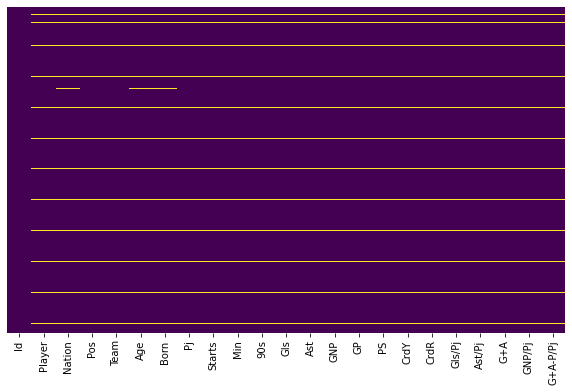

In [79]:
fn.check_nan(player)

In [83]:
player.dropna(inplace = True)
player.head()

,Id,Player,Nation,Pos,Team,Age,Born,Pj,Starts,Min,90s,Gls,Ast,GNP,GP,PS,CrdY,CrdR,Gls/Pj,Ast/Pj,G+A,GNP/Pj,G+A-P/Pj
0,0,Marcos Acuña,ar ARG,DF,Sevilla,31-015,1991.0,10.0,7.0,551,6.1,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.00,0.00,0.00,0.00,0.00
1,1,Álvaro Aguado,es ESP,MF,Valladolid,26-195,1996.0,13.0,8.0,747,8.3,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.00,0.24,0.24,0.00,0.24
2,2,Joseph Aidoo,gh GHA,DF,Celta Vigo,27-044,1995.0,14.0,14.0,"1,260",14.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.07,0.00,0.07,0.07,0.07
3,3,Sergio Akieme,es ESP,DF,Almería,24-331,1997.0,14.0,14.0,"1,260",14.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.00,0.00,0.00,0.00,0.00
4,4,Paul Akouokou,ci CIV,MF,Betis,24-327,1997.0,6.0,2.0,238,2.6,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.00,0.00,0.00,0.00


'N nan cols: 0'

Series([], dtype: float64)

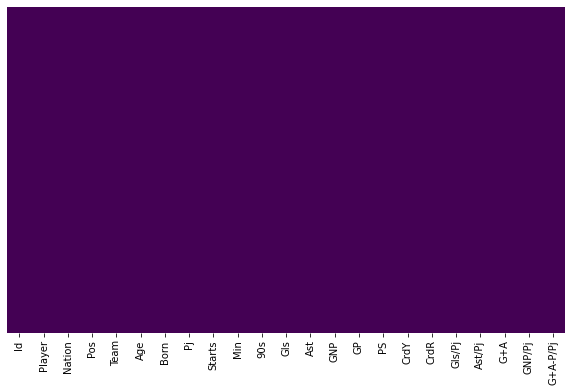

In [84]:
fn.check_nan(player)

In [88]:
lista = []
for x in range(len(player)):
    lista.append(x)
player.Id = lista
player.tail()

,Id,Player,Nation,Pos,Team,Age,Born,Pj,Starts,Min,90s,Gls,Ast,GNP,GP,PS,CrdY,CrdR,Gls/Pj,Ast/Pj,G+A,GNP/Pj,G+A-P/Pj
1090,1044,Ekain Zenitagoia,es ESP,FW,UD Ibiza,28-315,1994.0,14.0,10.0,896,10.0,2.0,2.0,1.0,1.0,1.0,2.0,0.0,0.20,0.20,0.40,0.10,0.30
1091,1045,Luca Zidane,fr FRA,GK,Eibar,24-183,1998.0,4.0,4.0,360,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
1092,1046,Elady Zorrilla,es ESP,"FW,MF",Tenerife,32-122,1990.0,3.0,0.0,79,0.9,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.14,0.00,1.14,0.00,0.00
1093,1047,Loren Zúñiga,es ESP,FW,Málaga,19-298,2003.0,8.0,2.0,256,2.8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.00,0.00,0.00,0.00
1094,1048,Uroš Đurđević,me MNE,FW,Sporting Gijón,28-255,1994.0,14.0,11.0,960,10.7,2.0,1.0,2.0,0.0,0.0,2.0,0.0,0.19,0.09,0.28,0.19,0.28


In [89]:
player.reset_index(drop=True, inplace=True)
player.tail()

,Id,Player,Nation,Pos,Team,Age,Born,Pj,Starts,Min,90s,Gls,Ast,GNP,GP,PS,CrdY,CrdR,Gls/Pj,Ast/Pj,G+A,GNP/Pj,G+A-P/Pj
1044,1044,Ekain Zenitagoia,es ESP,FW,UD Ibiza,28-315,1994.0,14.0,10.0,896,10.0,2.0,2.0,1.0,1.0,1.0,2.0,0.0,0.20,0.20,0.40,0.10,0.30
1045,1045,Luca Zidane,fr FRA,GK,Eibar,24-183,1998.0,4.0,4.0,360,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
1046,1046,Elady Zorrilla,es ESP,"FW,MF",Tenerife,32-122,1990.0,3.0,0.0,79,0.9,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.14,0.00,1.14,0.00,0.00
1047,1047,Loren Zúñiga,es ESP,FW,Málaga,19-298,2003.0,8.0,2.0,256,2.8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.00,0.00,0.00,0.00
1048,1048,Uroš Đurđević,me MNE,FW,Sporting Gijón,28-255,1994.0,14.0,11.0,960,10.7,2.0,1.0,2.0,0.0,0.0,2.0,0.0,0.19,0.09,0.28,0.19,0.28


In [90]:
player.info(memory_usage='deep') # Pj, Starts, Born, Gls, Ast, GNP, GP, PS, CrdY, CrdR sin floats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049 entries, 0 to 1048
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        1049 non-null   int64  
 1   Player    1049 non-null   object 
 2   Nation    1049 non-null   object 
 3   Pos       1049 non-null   object 
 4   Team      1049 non-null   object 
 5   Age       1049 non-null   object 
 6   Born      1049 non-null   float64
 7   Pj        1049 non-null   float64
 8   Starts    1049 non-null   float64
 9   Min       1049 non-null   object 
 10  90s       1049 non-null   float64
 11  Gls       1049 non-null   float64
 12  Ast       1049 non-null   float64
 13  GNP       1049 non-null   float64
 14  GP        1049 non-null   float64
 15  PS        1049 non-null   float64
 16  CrdY      1049 non-null   float64
 17  CrdR      1049 non-null   float64
 18  Gls/Pj    1049 non-null   float64
 19  Ast/Pj    1049 non-null   float64
 20  G+A       1049 non-null   floa

In [93]:
lista = ['Pj', 'Starts', 'Born', 'Gls', 'Ast', 'GNP', 'GP', 'PS', 'CrdY', 'CrdR']
for x in lista:
    temp = []
    for i in player[x]:
        i = int(i)
        temp.append(i)
    player[x] = temp
player.head()

,Id,Player,Nation,Pos,Team,Age,Born,Pj,Starts,Min,90s,Gls,Ast,GNP,GP,PS,CrdY,CrdR,Gls/Pj,Ast/Pj,G+A,GNP/Pj,G+A-P/Pj
0,0,Marcos Acuña,ar ARG,DF,Sevilla,31-015,1991,10,7,551,6.1,0,0,0,0,0,4,1,0.00,0.00,0.00,0.00,0.00
1,1,Álvaro Aguado,es ESP,MF,Valladolid,26-195,1996,13,8,747,8.3,0,2,0,0,0,1,0,0.00,0.24,0.24,0.00,0.24
2,2,Joseph Aidoo,gh GHA,DF,Celta Vigo,27-044,1995,14,14,"1,260",14.0,1,0,1,0,0,2,0,0.07,0.00,0.07,0.07,0.07
3,3,Sergio Akieme,es ESP,DF,Almería,24-331,1997,14,14,"1,260",14.0,0,0,0,0,0,3,0,0.00,0.00,0.00,0.00,0.00
4,4,Paul Akouokou,ci CIV,MF,Betis,24-327,1997,6,2,238,2.6,0,0,0,0,0,2,0,0.00,0.00,0.00,0.00,0.00


In [94]:
lista= []
for x in player.Min:
    x = x.replace(',', '')
    x = int(x)
    lista.append(x)
player.Min = lista
player.head()

,Id,Player,Nation,Pos,Team,Age,Born,Pj,Starts,Min,90s,Gls,Ast,GNP,GP,PS,CrdY,CrdR,Gls/Pj,Ast/Pj,G+A,GNP/Pj,G+A-P/Pj
0,0,Marcos Acuña,ar ARG,DF,Sevilla,31-015,1991,10,7,551,6.1,0,0,0,0,0,4,1,0.00,0.00,0.00,0.00,0.00
1,1,Álvaro Aguado,es ESP,MF,Valladolid,26-195,1996,13,8,747,8.3,0,2,0,0,0,1,0,0.00,0.24,0.24,0.00,0.24
2,2,Joseph Aidoo,gh GHA,DF,Celta Vigo,27-044,1995,14,14,1260,14.0,1,0,1,0,0,2,0,0.07,0.00,0.07,0.07,0.07
3,3,Sergio Akieme,es ESP,DF,Almería,24-331,1997,14,14,1260,14.0,0,0,0,0,0,3,0,0.00,0.00,0.00,0.00,0.00
4,4,Paul Akouokou,ci CIV,MF,Betis,24-327,1997,6,2,238,2.6,0,0,0,0,0,2,0,0.00,0.00,0.00,0.00,0.00


In [95]:
player.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049 entries, 0 to 1048
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        1049 non-null   int64  
 1   Player    1049 non-null   object 
 2   Nation    1049 non-null   object 
 3   Pos       1049 non-null   object 
 4   Team      1049 non-null   object 
 5   Age       1049 non-null   object 
 6   Born      1049 non-null   int64  
 7   Pj        1049 non-null   int64  
 8   Starts    1049 non-null   int64  
 9   Min       1049 non-null   int64  
 10  90s       1049 non-null   float64
 11  Gls       1049 non-null   int64  
 12  Ast       1049 non-null   int64  
 13  GNP       1049 non-null   int64  
 14  GP        1049 non-null   int64  
 15  PS        1049 non-null   int64  
 16  CrdY      1049 non-null   int64  
 17  CrdR      1049 non-null   int64  
 18  Gls/Pj    1049 non-null   float64
 19  Ast/Pj    1049 non-null   float64
 20  G+A       1049 non-null   floa

In [97]:
player.Team.unique()

array(['Sevilla', 'Valladolid', 'Celta Vigo', 'Almería', 'Betis',
       'Real Madrid', 'Cádiz', 'Barcelona', 'Villarreal', 'Getafe',
       'Elche', 'Real Sociedad', 'Valencia', 'Athletic Club', 'Mallorca',
       'Osasuna', 'Rayo Vallecano', 'Espanyol', 'Atlético Madrid',
       'Girona', 'Málaga', 'Ponferradina', 'Oviedo', 'Alavés', 'Andorra',
       'Racing Sant', 'Eibar', 'Lugo', 'Cartagena', 'Tenerife',
       'Albacete', 'Zaragoza', 'Villarreal B', 'Las Palmas', 'Burgos',
       'Huesca', 'Sporting Gijón', 'Granada', 'UD Ibiza', 'Leganés',
       'CD Mirandés', 'Levante'], dtype=object)

In [98]:
lista = []
for x in player.Team:
    x = x.replace('á','a').replace('é', 'e').replace('í', 'i').replace('ó', 'o').replace('ú', 'u')
    lista.append(x)
player.Team = lista
player.Team.unique()

array(['Sevilla', 'Valladolid', 'Celta Vigo', 'Almeria', 'Betis',
       'Real Madrid', 'Cadiz', 'Barcelona', 'Villarreal', 'Getafe',
       'Elche', 'Real Sociedad', 'Valencia', 'Athletic Club', 'Mallorca',
       'Osasuna', 'Rayo Vallecano', 'Espanyol', 'Atletico Madrid',
       'Girona', 'Malaga', 'Ponferradina', 'Oviedo', 'Alaves', 'Andorra',
       'Racing Sant', 'Eibar', 'Lugo', 'Cartagena', 'Tenerife',
       'Albacete', 'Zaragoza', 'Villarreal B', 'Las Palmas', 'Burgos',
       'Huesca', 'Sporting Gijon', 'Granada', 'UD Ibiza', 'Leganes',
       'CD Mirandes', 'Levante'], dtype=object)

In [99]:
#Comprobamos si los nombres de Equipos son iguales
lista = []
for x in team.Team:
    if x in player.Team.unique():
        continue
    else:
        lista.append(x)
lista

[]

In [103]:
lista = []
for x in player.Nation:
    x = x.split(' ')
    lista.append(x[1])
player.Nation = lista
player.Nation.unique()

array(['ARG', 'ESP', 'GHA', 'CIV', 'AUT', 'CHI', 'PAR', 'FRA', 'POR',
       'URU', 'SEN', 'MAR', 'GAB', 'SRB', 'ALB', 'BRA', 'CPV', 'MLI',
       'COD', 'DEN', 'CRO', 'BEL', 'NGA', 'SUI', 'MEX', 'NED', 'GUI',
       'MKD', 'TOG', 'COL', 'ITA', 'EQG', 'VEN', 'SWE', 'KOR', 'CAN',
       'CTA', 'GER', 'JPN', 'USA', 'POL', 'HON', 'UKR', 'AUS', 'MTQ',
       'GEO', 'MOZ', 'ALG', 'DOM', 'KVX', 'SVN', 'TUR', 'ECU', 'MNE',
       'NOR', 'PER', 'SVK', 'ISR', 'IRN', 'GRE', 'AND', 'ROU', 'ENG',
       'SLE', 'GNB', 'BOL', 'CMR', 'MTN', 'RUS', 'GAM', 'BHU'],
      dtype=object)

In [105]:
lista = []
for x in player.Age:
    x = x.split('-')
    lista.append(x[0])
player.Age = lista
player.Age.unique()

array(['31', '26', '27', '24', '30', '23', '33', '37', '25', '20', '18',
       '22', '28', '19', '35', '21', '34', '32', '17', '39', '29', '36',
       '41', '40', '38'], dtype=object)

In [106]:
lista = []
for x in player.Team:
    for pos, i in enumerate(team.Team):
        if x == i:
            lista.append(pos)
        else:
            continue
player["Id_Team"] = lista
player.head()

,Id,Player,Nation,Pos,Team,Age,Born,Pj,Starts,Min,90s,Gls,Ast,GNP,GP,PS,CrdY,CrdR,Gls/Pj,Ast/Pj,G+A,GNP/Pj,G+A-P/Pj,Id_Team
0,0,Marcos Acuña,ARG,DF,Sevilla,31,1991,10,7,551,6.1,0,0,0,0,0,4,1,0.00,0.00,0.00,0.00,0.00,16
1,1,Álvaro Aguado,ESP,MF,Valladolid,26,1996,13,8,747,8.3,0,2,0,0,0,1,0,0.00,0.24,0.24,0.00,0.24,18
2,2,Joseph Aidoo,GHA,DF,Celta Vigo,27,1995,14,14,1260,14.0,1,0,1,0,0,2,0,0.07,0.00,0.07,0.07,0.07,6
3,3,Sergio Akieme,ESP,DF,Almeria,24,1997,14,14,1260,14.0,0,0,0,0,0,3,0,0.00,0.00,0.00,0.00,0.00,0
4,4,Paul Akouokou,CIV,MF,Betis,24,1997,6,2,238,2.6,0,0,0,0,0,2,0,0.00,0.00,0.00,0.00,0.00,4


### LIMPIAMOS MATCHES

In [108]:
match.head()

,Unnamed: 0,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,LBH,LBD,LBA,SJH,SJD,SJA,GBH,GBD,GBA,BSH,BSD,BSA,SBH,SBD,SBA,Unnamed: 58,Unnamed: 59,Unnamed: 60
0,0,SP1,12/08/2022,20:00,Osasuna,Sevilla,2.0,1.0,H,1.0,1.0,D,12.0,10.0,5.0,3.0,16.0,9.0,5.0,2.0,5.0,3.0,0.0,0.0,3.20,3.10,2.40,3.20,3.00,2.40,3.20,3.05,2.45,3.38,3.10,2.48,3.20,3.0,2.40,3.25,3.10,2.40,3.41,3.24,2.49,3.28,3.08,2.43,2.62,1.50,2.55,1.57,2.62,1.60,2.50,1.54,0.25,1.83,2.07,1.85,2.09,1.87,2.09,1.82,2.04,3.10,3.1,2.55,3.10,2.95,2.50,3.15,3.05,2.45,3.19,3.06,2.63,3.25,2.90,2.45,3.10,3.0,2.55,3.52,3.14,2.66,3.20,3.04,2.50,2.62,1.50,2.63,1.54,2.69,1.57,2.55,1.52,0.25,1.73,2.08,1.76,2.20,1.88,2.23,1.79,2.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,SP1,13/08/2022,16:00,Celta,Espanol,2.0,2.0,D,1.0,0.0,H,8.0,10.0,3.0,2.0,17.0,15.0,3.0,3.0,5.0,2.0,0.0,0.0,1.80,3.75,4.75,1.83,3.60,4.33,1.83,3.55,4.60,1.81,3.75,4.87,1.83,3.5,4.33,1.75,3.50,4.50,1.90,3.77,4.90,1.83,3.68,4.50,2.00,1.80,2.10,1.81,2.13,1.87,2.04,1.80,-0.50,1.77,2.02,1.80,2.13,1.86,2.13,1.81,2.05,1.72,3.6,4.75,1.75,3.50,5.00,1.77,3.50,5.00,1.78,3.62,5.39,1.75,3.50,5.00,1.75,3.6,5.00,1.84,3.73,5.39,1.78,3.58,5.00,2.20,1.66,2.24,1.71,2.26,1.83,2.19,1.70,-0.75,2.00,1.90,2.02,1.91,2.06,1.93,2.01,1.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,SP1,13/08/2022,18:00,Valladolid,Villarreal,0.0,3.0,A,0.0,0.0,D,12.0,10.0,6.0,4.0,6.0,10.0,4.0,5.0,1.0,0.0,0.0,0.0,3.90,3.60,1.90,3.80,3.50,1.95,3.85,3.60,1.95,4.05,3.78,1.95,3.90,3.5,1.95,3.80,3.50,1.90,4.10,3.80,2.00,3.93,3.66,1.94,1.99,1.91,2.00,1.91,2.00,1.92,1.95,1.87,0.50,1.95,1.95,1.97,1.95,1.97,1.98,1.93,1.93,3.30,3.4,2.20,4.00,3.40,1.95,3.35,3.35,2.20,3.54,3.44,2.23,3.50,3.25,2.15,3.40,3.4,2.20,3.66,3.47,2.25,3.45,3.39,2.19,2.00,1.80,2.09,1.81,2.14,1.90,2.05,1.79,0.25,2.02,1.88,2.02,1.91,2.03,1.91,1.98,1.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,SP1,13/08/2022,20:00,Barcelona,Vallecano,0.0,0.0,D,0.0,0.0,D,21.0,4.0,6.0,2.0,16.0,14.0,8.0,0.0,3.0,6.0,1.0,0.0,1.22,7.00,12.00,1.21,6.75,13.50,1.22,6.75,13.00,1.22,6.83,15.00,1.18,6.5,17.00,1.18,6.50,13.00,1.24,7.40,17.00,1.21,6.79,14.20,1.53,2.50,1.55,2.57,1.55,2.73,1.50,2.58,-2.00,2.09,1.81,2.15,1.78,2.16,1.88,2.04,1.83,1.22,6.5,12.00,1.25,6.25,11.00,1.22,6.50,12.00,1.24,6.80,13.50,1.20,6.50,15.00,1.20,7.0,13.00,1.25,7.40,16.75,1.22,6.82,13.42,1.50,2.62,1.51,2.68,1.58,2.79,1.50,2.61,-1.75,1.82,2.08,1.83,2.08,1.86,2.14,1.82,2.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,SP1,14/08/2022,16:30,Cadiz,Sociedad,0.0,1.0,A,0.0,1.0,A,7.0,15.0,2.0,7.0,9.0,20.0,3.0,6.0,4.0,2.0,0.0,0.0,3.60,3.20,2.20,3.40,3.20,2.20,3.45,3.20,2.20,3.62,3.29,2.26,3.40,3.2,2.20,3.50,3.13,2.15,3.75,3.33,2.26,3.55,3.24,2.20,2.37,1.57,2.50,1.59,2.50,1.65,2.38,1.59,0.25,1.99,1.91,2.00,1.93,2.05,1.93,1.98,1.87,3.80,3.0,2.15,3.70,3.00,2.20,3.65,3.05,2.25,4.03,3.08,2.22,3.90,3.00,2.15,3.75,3.1,2.20,4.05,3.18,2.25,3.80,3.07,2.20,2.62,1.50,2.74,1.51,2.75,1.55,2.61,1.50,0.25,2.05,1.85,2.06

'N nan cols: 61'

Div          0.020517
Date         0.020517
HomeTeam     0.020517
AwayTeam     0.020517
FTHG         0.020517
              ...    
BSD         65.490357
BSA         65.490357
SBH         59.889208
SBD         59.889208
SBA         59.889208
Length: 61, dtype: float64

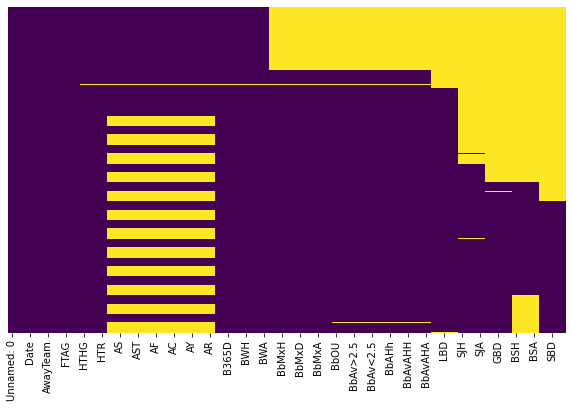

In [141]:
fn.check_nan(match)


'N nan cols: 138'

Div          0.020517
Date         0.020517
Time        80.638764
HomeTeam     0.020517
AwayTeam     0.020517
              ...    
BSD         65.490357
BSA         65.490357
SBH         59.889208
SBD         59.889208
SBA         59.889208
Length: 138, dtype: float64

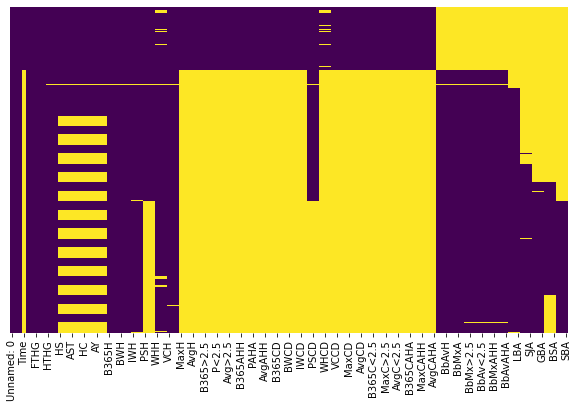

In [110]:
match.drop(['Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60'], axis=1, inplace = True)
fn.check_nan(match)

'N nan cols: 61'

Div          0.020517
Date         0.020517
HomeTeam     0.020517
AwayTeam     0.020517
FTHG         0.020517
              ...    
BSD         65.490357
BSA         65.490357
SBH         59.889208
SBD         59.889208
SBA         59.889208
Length: 61, dtype: float64

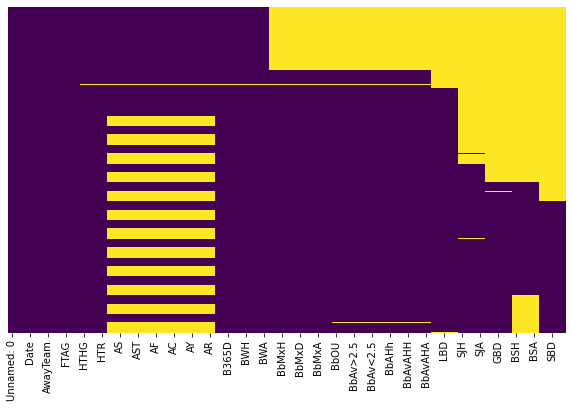

In [139]:
match.drop(['Time','IWH','IWD','IWA', 'PSH', 'PSD', 'PSA', 'WHH','WHD','WHA','VCH','VCD',
            'VCA', 'MaxH','MaxD','MaxA','AvgH','AvgD','AvgA', 'B365>2.5','B365<2.5', 
            'P>2.5','P<2.5','Max>2.5','Max<2.5','Avg>2.5','Avg<2.5','AHh','B365AHH','B365AHA',
            'PAHH','PAHA','MaxAHH','MaxAHA','AvgAHH','AvgAHA','B365CH','B365CD','B365CA', 
            'BWCH','BWCD','BWCA','IWCH','IWCD','IWCA','PSCH','PSCD','PSCA','WHCH','WHCD',
            'WHCA','VCCH','VCCD','VCCA','MaxCH','MaxCD','MaxCA','AvgCH','AvgCD','AvgCA',
            'B365C>2.5','B365C<2.5','PC>2.5','PC<2.5','MaxC>2.5','MaxC<2.5','AvgC>2.5',
            'AvgC<2.5','AHCh','B365CAHH','B365CAHA','PCAHH','PCAHA','MaxCAHH','MaxCAHA',
            'AvgCAHH','AvgCAHA'], axis=1, inplace = True)
fn.check_nan(match)

In [143]:
match.tail()

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,LBH,LBD,LBA,SJH,SJD,SJA,GBH,GBD,GBA,BSH,BSD,BSA,SBH,SBD,SBA
14617,14617,SP2,17/06/06,Sp Gijon,Murcia,1.0,0.0,H,0.0,0.0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,2.75,3.75,1.85,2.85,4.35,22.0,2.10,2.03,2.92,2.78,4.00,3.71,5.0,1.98,1.97,1.86,1.86,6.0,-0.25,1.87,1.85,2.02,2.00,NaN,NaN,NaN,2.00,2.62,4.00,2.05,2.80,3.55,NaN,NaN,NaN,2.10,2.80,3.60
14618,14618,SP2,17/06/06,Tenerife,Albacete,1.0,1.0,D,0.0,0.0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.10,2.75,3.50,2.00,2.70,4.00,22.0,2.10,2.05,2.90,2.77,4.25,3.70,6.0,1.91,1.88,1.95,1.94,6.0,-0.25,1.81,1.80,2.05,2.05,NaN,NaN,NaN,2.10,2.75,3.50,2.05,2.75,3.60,NaN,NaN,NaN,2.10,2.80,3.60
14619,14619,SP2,17/06/06,Valladolid,Elche,2.0,2.0,D,0.0,2.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,2.87,3.60,1.95,2.85,3.85,22.0,2.00,1.95,3.10,2.87,4.33,3.88,5.0,1.91,1.88,1.95,1.94,6.0,-0.5,2.09,2.06,1.84,1.81,NaN,NaN,NaN,1.91,2.75,4.33,1.95,2.85,3.80,NaN,NaN,NaN,2.00,2.88,3.75
14620,14620,SP2,17/06/06,Xerez,Malaga B,4.0,2.0,H,4.0,1.0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.61,3.25,5.00,1.65,3.30,4.65,22.0,1.68,1.61,3.50,3.31,6.00,5.16,8.0,1.97,1.90,1.95,1.92,6.0,-0.75,1.77,1.77,2.11,2.09,NaN,NaN,NaN,1.50,3.50,6.00,1.60,3.30,5.00,NaN,NaN,NaN,1.62,3.20,5.50
14621,14621,SP2,18/06/06,Hercules,Recreativo,0.0,2.0,A,0.0,2.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.75,2.75,2.50,2.85,2.70,2.50,20.0,3.00,2.81,3.00,2.78,2.60,2.47,5.0,1.85,1.84,2.00,1.99,4.0,0.0,2.10,2.09,1.78,1.76,NaN,NaN,NaN,2.75,3.00,2.38,2.80,2.75,2.45,NaN,NaN,NaN,3.00,2.75,2.40


'N nan cols: 7'

Bb1X2    19.593763
BbMxH    19.593763
BbAvH    19.593763
BbMxD    19.593763
BbAvD    19.593763
BbMxA    19.593763
BbAvA    19.593763
dtype: float64

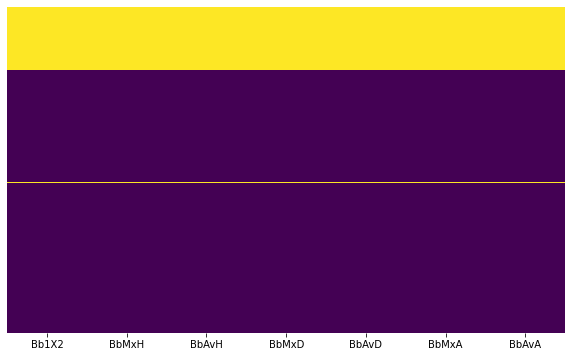

In [158]:
fn.check_nan(match[['Bb1X2','BbMxH','BbAvH','BbMxD','BbAvD','BbMxA','BbAvA']])

'N nan cols: 28'

Div          0.020517
Date         0.020517
HomeTeam     0.020517
AwayTeam     0.020517
FTHG         0.020517
FTAG         0.020517
FTR          0.020517
HTHG         0.164136
HTAG         0.164136
HTR          0.164136
HS          38.079606
AS          38.079606
HST         38.079606
AST         38.079606
HF          38.079606
AF          38.079606
HC          38.079606
AC          38.079606
HY          38.079606
AY          38.079606
HR          38.079606
AR          38.079606
B365H        0.280399
B365D        0.280399
B365A        0.280399
BWH          0.478731
BWD          0.478731
BWA          0.478731
dtype: float64

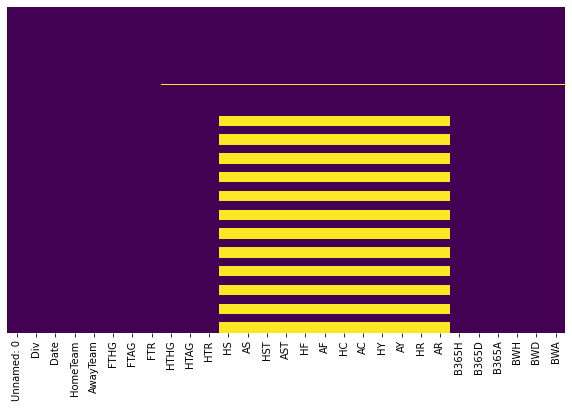

In [160]:
match.drop(['SBH','SBD','SBA','LBH','LBD','LBA','BSH','BSD','BSA','SJH','SJD','SJA',
            'GBH','GBD','GBA','BbAH','BbAHh','BbMxAHH','BbAvAHH','BbMxAHA','BbAvAHA',
            'BbMx>2.5','BbAv>2.5','BbMx<2.5','BbAv<2.5','BbOU','Bb1X2','BbMxH','BbAvH',
            'BbMxD','BbAvD','BbMxA','BbAvA'], axis=1, inplace = True)
fn.check_nan(match)

In [161]:
match.isnull().sum()

Unnamed: 0       0
Div              3
Date             3
HomeTeam         3
AwayTeam         3
FTHG             3
FTAG             3
FTR              3
HTHG            24
HTAG            24
HTR             24
HS            5568
AS            5568
HST           5568
AST           5568
HF            5568
AF            5568
HC            5568
AC            5568
HY            5568
AY            5568
HR            5568
AR            5568
B365H           41
B365D           41
B365A           41
BWH             70
BWD             70
BWA             70
dtype: int64

In [166]:
round(match['AR'].mean())

0

In [168]:
match['HS'].fillna(round(match['HS'].mean()), inplace=True)
match['AS'].fillna(round(match['AS'].mean()), inplace=True)
match['HST'].fillna(round(match['HST'].mean()), inplace=True)
match['AST'].fillna(round(match['AST'].mean()), inplace=True)
match['HF'].fillna(round(match['HF'].mean()), inplace=True)
match['AF'].fillna(round(match['AF'].mean()), inplace=True)
match['HC'].fillna(round(match['HC'].mean()), inplace=True)
match['AC'].fillna(round(match['AC'].mean()), inplace=True)
match['HY'].fillna(round(match['HY'].mean()), inplace=True)
match['AY'].fillna(round(match['AY'].mean()), inplace=True)
match['HR'].fillna(round(match['HR'].mean()), inplace=True)
match['AR'].fillna(round(match['AR'].mean()), inplace=True)
match.isnull().sum()

Unnamed: 0     0
Div            3
Date           3
HomeTeam       3
AwayTeam       3
FTHG           3
FTAG           3
FTR            3
HTHG          24
HTAG          24
HTR           24
HS             0
AS             0
HST            0
AST            0
HF             0
AF             0
HC             0
AC             0
HY             0
AY             0
HR             0
AR             0
B365H         41
B365D         41
B365A         41
BWH           70
BWD           70
BWA           70
dtype: int64

In [183]:
for pos, x in enumerate(match['Div'].isnull()):
    #print(pos,x)
    if x == True:
        print(pos,x)
    else:
        continue

7883 True
8726 True
8727 True


In [186]:
match.columns

Index(['Unnamed: 0', 'Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'FTR', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF',
       'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH',
       'BWD', 'BWA'],
      dtype='object')

In [188]:
match[['Unnamed: 0', 'Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'FTR', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF',
       'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH',
       'BWD', 'BWA']]

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA
0,0,SP1,12/08/2022,Osasuna,Sevilla,2.0,1.0,H,1.0,1.0,D,12.0,10.0,5.0,3.0,16.0,9.0,5.0,2.0,5.0,3.0,0.0,0.0,3.20,3.10,2.40,3.20,3.00,2.40
1,1,SP1,13/08/2022,Celta,Espanol,2.0,2.0,D,1.0,0.0,H,8.0,10.0,3.0,2.0,17.0,15.0,3.0,3.0,5.0,2.0,0.0,0.0,1.80,3.75,4.75,1.83,3.60,4.33
2,2,SP1,13/08/2022,Valladolid,Villarreal,0.0,3.0,A,0.0,0.0,D,12.0,10.0,6.0,4.0,6.0,10.0,4.0,5.0,1.0,0.0,0.0,0.0,3.90,3.60,1.90,3.80,3.50,1.95
3,3,SP1,13/08/2022,Barcelona,Vallecano,0.0,0.0,D,0.0,0.0,D,21.0,4.0,6.0,2.0,16.0,14.0,8.0,0.0,3.0,6.0,1.0,0.0,1.22,7.00,12.00,1.21,6.75,13.50
4,4,SP1,14/08/2022,Cadiz,Sociedad,0.0,1.0,A,0.0,1.0,A,7.0,15.0,2.0,7.0,9.0,20.0,3.0,6.0,4.0,2.0,0.0,0.0,3.60,3.20,2.20,3.40,3.20,2.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14617,14617,SP2,17/06/06,Sp Gijon,Murcia,1.0,0.0,H,0.0,0.0,D,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,2.00,2.75,3.75,1.85,2.85,4.35
14618,14618,SP2,17/06/06,Tenerife,Albacete,1.0,1.0,D,0.0,0.0,D,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,2.10,2.75,3.50,2.00,2.70,4.00
14619,14619,SP2,17/06/06,Valladolid,Elche,2.0,2.0,D,0.0,2.0,A,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,2.00,2.87,3.60,1.95,2.85,3.85
14620,14620,SP2,17/06/06,Xerez,Malaga B,4.0,2.0,H,4.0,1.0,H,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,1.61,3.25,5.00,1.65,3.30,4.65


In [194]:
match.loc[match['Div'] != 'SP1'].loc[match['Div'] != 'SP2']

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA
7883,7883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
8726,8726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
8727,8727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
match.drop(index=[7883, 8726, 8727], inplace = True)
match.loc[match['Div'] != 'SP1'].loc[match['Div'] != 'SP2']

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA


'N nan cols: 9'

HTHG     0.143649
HTAG     0.143649
HTR      0.143649
B365H    0.259936
B365D    0.259936
B365A    0.259936
BWH      0.458308
BWD      0.458308
BWA      0.458308
dtype: float64

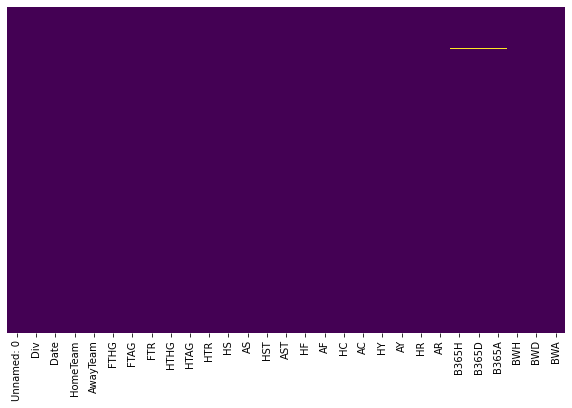

In [209]:
fn.check_nan(match)

In [199]:
nulos = []
for pos, x in enumerate(match['HTHG'].isnull()):
    #print(pos,x)
    if x == True:
        #print(pos,x)
        nulos.append(pos)
    else:
        continue
nulos

[3446,
 3459,
 3473,
 3478,
 3496,
 3504,
 3516,
 3526,
 3539,
 3546,
 3561,
 3572,
 3583,
 3586,
 3605,
 3607,
 3619,
 3638,
 3648,
 3654,
 3667]

In [206]:
match.iloc[nulos]

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA
3446,3446,SP2,19/01/2019,Reus Deportiu,Las Palmas,0.0,1.0,A,NaN,NaN,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3459,3459,SP2,27/01/2019,Albacete,Reus Deportiu,1.0,0.0,H,NaN,NaN,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3473,3473,SP2,03/02/2019,Reus Deportiu,Elche,0.0,1.0,A,NaN,NaN,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3478,3478,SP2,09/02/2019,Gimnastic,Reus Deportiu,1.0,0.0,H,NaN,NaN,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3496,3496,SP2,17/02/2019,Reus Deportiu,Almeria,0.0,1.0,A,NaN,NaN,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3504,3504,SP2,24/02/2019,Granada,Reus Deportiu,1.0,0.0,H,NaN,NaN,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3516,3516,SP2,03/03/2019,Reus Deportiu,Tenerife,0.0,1.0,A,NaN,NaN,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3526,3526,SP2,10/03/2019,Lugo,Reus Deportiu,1.0,0.0,H,NaN,NaN,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3539,3539,SP2,17/03/2019,Reus Deportiu,La Coruna,0.0,1.0,A,NaN,NaN,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3546,3546,SP2,24/03/2019,Extremadura UD,Reus Deportiu,1.0,0.0,H,NaN,NaN,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [211]:
match[['HTHG','HTAG']] = match[['HTHG','HTAG']].fillna(0.0)
match.iloc[nulos]

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA
3446,3446,SP2,19/01/2019,Reus Deportiu,Las Palmas,0.0,1.0,A,0.0,0.0,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3459,3459,SP2,27/01/2019,Albacete,Reus Deportiu,1.0,0.0,H,0.0,0.0,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3473,3473,SP2,03/02/2019,Reus Deportiu,Elche,0.0,1.0,A,0.0,0.0,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3478,3478,SP2,09/02/2019,Gimnastic,Reus Deportiu,1.0,0.0,H,0.0,0.0,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3496,3496,SP2,17/02/2019,Reus Deportiu,Almeria,0.0,1.0,A,0.0,0.0,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3504,3504,SP2,24/02/2019,Granada,Reus Deportiu,1.0,0.0,H,0.0,0.0,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3516,3516,SP2,03/03/2019,Reus Deportiu,Tenerife,0.0,1.0,A,0.0,0.0,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3526,3526,SP2,10/03/2019,Lugo,Reus Deportiu,1.0,0.0,H,0.0,0.0,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3539,3539,SP2,17/03/2019,Reus Deportiu,La Coruna,0.0,1.0,A,0.0,0.0,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3546,3546,SP2,24/03/2019,Extremadura UD,Reus Deportiu,1.0,0.0,H,0.0,0.0,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [212]:
match['HTR'] = match['HTR'].fillna('D')
match.iloc[nulos]

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA
3446,3446,SP2,19/01/2019,Reus Deportiu,Las Palmas,0.0,1.0,A,0.0,0.0,D,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3459,3459,SP2,27/01/2019,Albacete,Reus Deportiu,1.0,0.0,H,0.0,0.0,D,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3473,3473,SP2,03/02/2019,Reus Deportiu,Elche,0.0,1.0,A,0.0,0.0,D,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3478,3478,SP2,09/02/2019,Gimnastic,Reus Deportiu,1.0,0.0,H,0.0,0.0,D,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3496,3496,SP2,17/02/2019,Reus Deportiu,Almeria,0.0,1.0,A,0.0,0.0,D,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3504,3504,SP2,24/02/2019,Granada,Reus Deportiu,1.0,0.0,H,0.0,0.0,D,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3516,3516,SP2,03/03/2019,Reus Deportiu,Tenerife,0.0,1.0,A,0.0,0.0,D,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3526,3526,SP2,10/03/2019,Lugo,Reus Deportiu,1.0,0.0,H,0.0,0.0,D,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3539,3539,SP2,17/03/2019,Reus Deportiu,La Coruna,0.0,1.0,A,0.0,0.0,D,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3546,3546,SP2,24/03/2019,Extremadura UD,Reus Deportiu,1.0,0.0,H,0.0,0.0,D,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


'N nan cols: 6'

B365H    0.259936
B365D    0.259936
B365A    0.259936
BWH      0.458308
BWD      0.458308
BWA      0.458308
dtype: float64

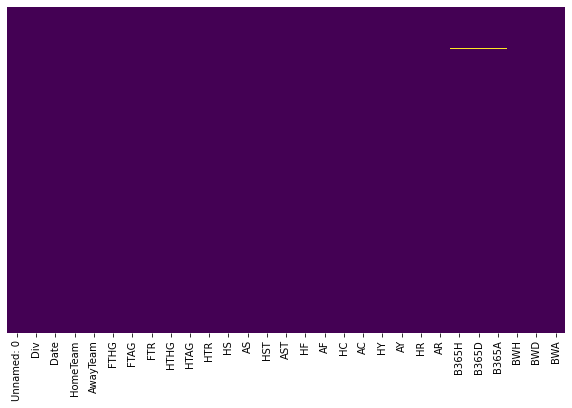

In [213]:
fn.check_nan(match)